In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mnist_data = pd.read_csv("/content/mnist.csv").values

labels = mnist_data[:, 0]
digits = mnist_data[:, 1:]
img_size = 28

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# For image resizing
import cv2

X = digits
y = labels

In [2]:
def resize_images(images, original_size=(28, 28), new_size=(14, 14)):
    resized_images = np.empty((len(images), new_size[0] * new_size[1]))

    for i, image in enumerate(images):
        # Ensure the image is not empty
        if image.size == 0:
            raise ValueError(f"Empty image at index {i}")

        # Reshape the image to its original 2D shape
        reshaped_image = image.reshape(original_size).astype(np.uint8)

        # Resize the image
        resized = cv2.resize(reshaped_image, new_size, interpolation=cv2.INTER_AREA)

        # Flatten and store the resized image
        resized_images[i] = resized.flatten()

    return resized_images

# Test the function with a single image
X_resized = resize_images(X)

# Splitting the data: 5k for training and the rest for testing
# Stratify ensures we have similar distributions of labels on test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X_resized, y, train_size=5000, stratify=y, random_state=42)

Accuracy on the test set: 0.9587567567567568


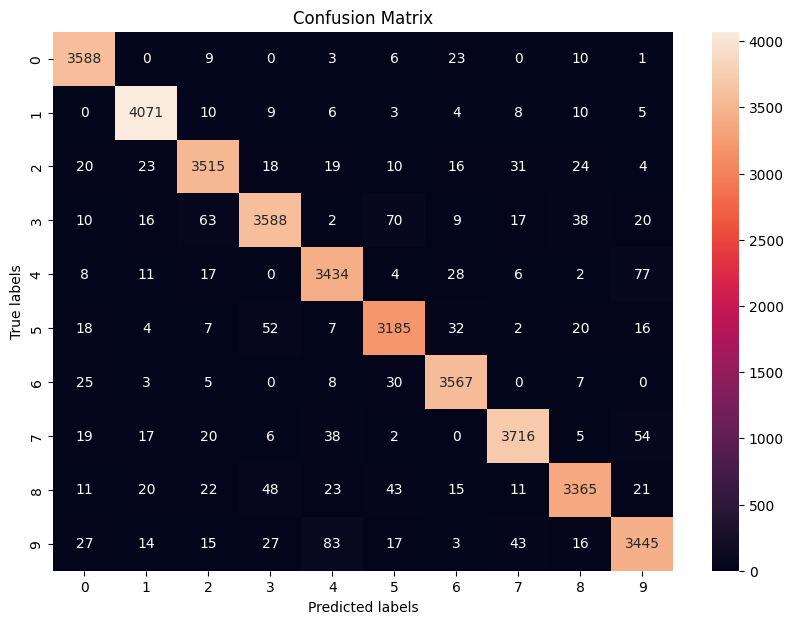

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      3640
           1       0.97      0.99      0.98      4126
           2       0.95      0.96      0.95      3680
           3       0.96      0.94      0.95      3833
           4       0.95      0.96      0.95      3587
           5       0.95      0.95      0.95      3343
           6       0.96      0.98      0.97      3645
           7       0.97      0.96      0.96      3877
           8       0.96      0.94      0.95      3579
           9       0.95      0.93      0.94      3690

    accuracy                           0.96     37000
   macro avg       0.96      0.96      0.96     37000
weighted avg       0.96      0.96      0.96     37000



In [3]:
##### SVM #####

svm_c_value = 24.420530945486497

svm_model = SVC(kernel='rbf', C=svm_c_value, gamma='scale')

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Accuracy on the test set: 0.8998648648648648


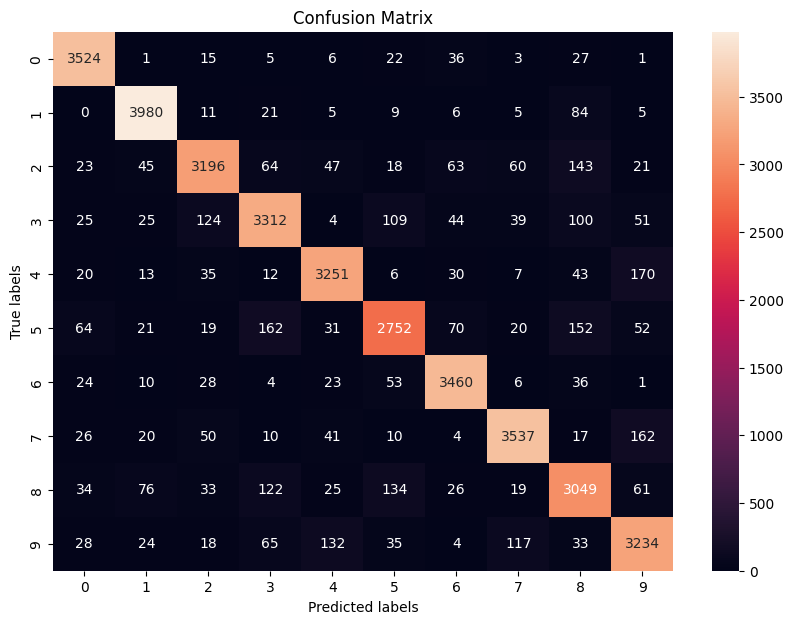

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      3640
           1       0.94      0.96      0.95      4126
           2       0.91      0.87      0.89      3680
           3       0.88      0.86      0.87      3833
           4       0.91      0.91      0.91      3587
           5       0.87      0.82      0.85      3343
           6       0.92      0.95      0.94      3645
           7       0.93      0.91      0.92      3877
           8       0.83      0.85      0.84      3579
           9       0.86      0.88      0.87      3690

    accuracy                           0.90     37000
   macro avg       0.90      0.90      0.90     37000
weighted avg       0.90      0.90      0.90     37000



In [4]:
##### Logistic Regression #####

logisticReg_c_value = 0.0062505519252739694

logisticRegression_model = LogisticRegression(penalty='l1', C=logisticReg_c_value, solver='liblinear', random_state=42, multi_class='ovr')
logisticRegression_model.fit(X_train, y_train)

# Predicting the labels of the test set
y_pred_test = logisticRegression_model.predict(X_test)

# Calculating the accuracy of the predictions
test_accuracy = accuracy_score(y_test, y_pred_test)

# Printing the accuracy
print("Accuracy on the test set:", test_accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate a classification report
classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:\n", classification_rep)

In [5]:
!pip install statsmodels

McNemar's Test statistic: 280.000, p-value: 0.000000


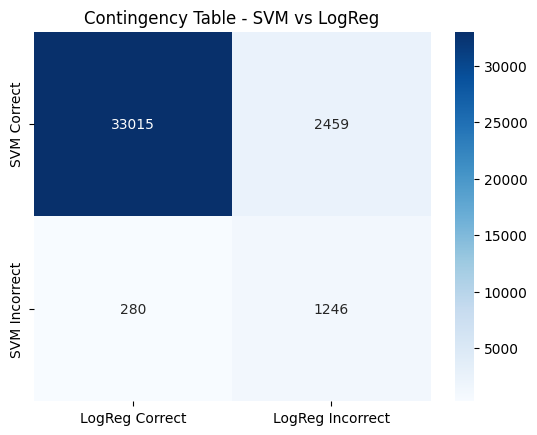

In [20]:
##### McNemar's Test #####

from statsmodels.stats.contingency_tables import mcnemar

# Renaming to avoid confusion
svm_pred = y_pred
logreg_pred = y_pred_test

# Create the contingency table
contingency_table = [[((svm_pred == y_test) & (logreg_pred == y_test)).sum(),
                      ((svm_pred == y_test) & (logreg_pred != y_test)).sum()],
                     [((svm_pred != y_test) & (logreg_pred == y_test)).sum(),
                      ((svm_pred != y_test) & (logreg_pred != y_test)).sum()]]

# Apply McNemar's test
result = mcnemar(contingency_table, exact=True)  # Use exact=False for large sample sizes
print('McNemar\'s Test statistic: %.3f, p-value: %.6f' % (result.statistic, result.pvalue))

# A high test statistic value means that there is a significant discrepancy in the performance of the two models on certain instances in the dataset.


# Create a heatmap
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues',
            xticklabels=['LogReg Correct', 'LogReg Incorrect'],
            yticklabels=['SVM Correct', 'SVM Incorrect'])
plt.title('Contingency Table - SVM vs LogReg')
plt.show()